# Tutorial 8: Outputs

Once an instance of GenX is run, a series of csv files describing the outputs are created and put in to a folder titled `results`. This folder will appear automatically in the case folder. For a detailed description of all files, see the <a href="https://genxproject.github.io/GenX.jl/dev/User_Guide/model_output/" target="_blank">documentation</a> . This tutorial goes over key files in `results` and visualizes some of the outputs.

### Table of Contents
* [Power](#power)
* [Cost and Revenue](#cost)
* [Emmissions](#emms)

Let's get things started by running an instance of GenX using `Run.jl`. You can skip this step if you already have a results folder you would like to analyze. 

In [21]:
using DataFrames
using CSV
using YAML
using GraphRecipes
using Plots
using PlotlyJS
using VegaLite
using StatsPlots
using GenX

In [2]:
case = joinpath("example_systems/1_three_zones");

In [9]:
include("example_systems/1_three_zones/Run.jl")

Configuring Settings
Clustering Time Series Data (Grouped)...
Reading Input CSV Files
Network.csv Successfully Read!
Demand (load) data Successfully Read!
Fuels_data.csv Successfully Read!


[ Info: Thermal.csv Successfully Read.
[ Info: Vre.csv Successfully Read.
[ Info: Storage.csv Successfully Read.
[ Info: Resource_energy_share_requirement.csv Successfully Read.
[ Info: Resource_capacity_reserve_margin.csv Successfully Read.
[ Info: Resource_minimum_capacity_requirement.csv Successfully Read.



Summary of resources loaded into the model:
-------------------------------------------------------
	Resource type 		Number of resources
	Thermal        		3
	VRE            		4
	Storage        		3
Total number of resources: 10
-------------------------------------------------------
Generators_variability.csv Successfully Read!
Validating time basis
Minimum_capacity_requirement.csv Successfully Read!
CO2_cap.csv Successfully Read!
CSV Files Successfully Read In From /Users/mayamutic/Desktop/GenX-Tutorials/Tutorials/example_systems/1_three_zones
Error: Geography Key 1 is invalid. Select `System' or `Zone'.
Configuring Solver
Loading Inputs
Reading Input CSV Files
Network.csv Successfully Read!
Demand (load) data Successfully Read!
Fuels_data.csv Successfully Read!

Summary of resources loaded into the model:
-------------------------------------------------------
	Resource type 		Number of resources
	Thermal        		3
	VRE            		4
	Storage        		3
Total number of resources: 1

[ Info: Thermal.csv Successfully Read.
[ Info: Vre.csv Successfully Read.
[ Info: Storage.csv Successfully Read.
[ Info: Resource_energy_share_requirement.csv Successfully Read.
[ Info: Resource_capacity_reserve_margin.csv Successfully Read.
[ Info: Resource_minimum_capacity_requirement.csv Successfully Read.


Discharge Module
Non-served Energy Module
Investment Discharge Module
Unit Commitment Module
Fuel Module
CO2 Module
Investment Transmission Module
Transmission Module
Dispatchable Resources Module
Storage Resources Module
Storage Investment Module
Storage Core Resources Module
Storage Resources with Symmetric Charge/Discharge Capacity Module
Thermal (Unit Commitment) Resources Module
CO2 Policies Module
Minimum Capacity Requirement Module
Time elapsed for model building is
5.603421708
Solving Model
Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
118205 rows, 81250 cols, 467328 nonzeros
110786 rows, 73831 cols, 468870 nonzeros
Presolve : Reductions: rows 110786(-42612); columns 73831(-46308); elements 468870(-46667)
Solving the presolved LP
IPX model has 110786 rows, 73831 columns and 468870 nonzeros
Input
    Number of variables:                                73831
    Number of free variables:                           3696
    Number of constra

Time elapsed for writing costs is
0.844756084
Time elapsed for writing capacity is
0.234613375
Time elapsed for writing power is
0.554344875
Time elapsed for writing charge is
0.249547208
Time elapsed for writing capacity factor is
0.260518167
Time elapsed for writing storage is
0.114146791
Time elapsed for writing curtailment is
0.158110917
Time elapsed for writing nse is
0.416625666
Time elapsed for writing power balance is
0.284898583
Time elapsed for writing transmission flows is
0.118811
Time elapsed for writing transmission losses is
0.081674833
Time elapsed for writing network expansion is
0.080983417
Time elapsed for writing emissions is
0.277708417
Time elapsed for writing reliability is
0.093896209
Time elapsed for writing storage duals is
0.382258417
Time elapsed for writing commitment is
0.0875145
Time elapsed for writing startup is
0.046588
Time elapsed for writing shutdown is
0.012896125
Time elapsed for writing fuel consumption is
0.296924584
Time elapsed for writing co2

Below are all 33 files output by running GenX:

In [3]:
results = cd(readdir,joinpath(case,"results"))

33-element Vector{String}:
 "CO2_prices_and_penalties.csv"
 "ChargingCost.csv"
 "EnergyRevenue.csv"
 "FuelConsumption_plant_MMBTU.csv"
 "FuelConsumption_total_MMBTU.csv"
 "Fuel_cost_plant.csv"
 "MinCapReq_prices_and_penalties.csv"
 "NetRevenue.csv"
 "RegSubsidyRevenue.csv"
 "SubsidyRevenue.csv"
 "capacity.csv"
 "capacityfactor.csv"
 "charge.csv"
 ⋮
 "power.csv"
 "power_balance.csv"
 "prices.csv"
 "reliability.csv"
 "run_settings.yml"
 "shutdown.csv"
 "start.csv"
 "status.csv"
 "storage.csv"
 "storagebal_duals.csv"
 "time_weights.csv"
 "tlosses.csv"

### Power <a id="power"></a>

The file `power.csv`, shown below,  outputs the power in MW discharged by each node at each time step. Note that if TimeDomainReduction is in use the file will be shorter. The first row states which zone each node is part of, and the total power per year is located in the second row. After that, each row represents one time step of the series.

In [4]:
power =  CSV.read(joinpath(case,"results/power.csv"),DataFrame,missingstring="NA")

Row,Resource,MA_natural_gas_combined_cycle,CT_natural_gas_combined_cycle,ME_natural_gas_combined_cycle,MA_solar_pv,CT_onshore_wind,CT_solar_pv,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Total
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Zone,1.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,0.0
2,AnnualSum,1.05862e7,3.4267e6,8.85336e5,3.49456e7,3.54989e7,1.42853e7,2.33054e7,9.73799e6,1.3938e7,3.7731e6,1.50383e8
3,t1,-0.0,-0.0,-0.0,-0.0,8577.12,-0.0,5175.24,854.11,2309.3,650.686,17566.5
4,t2,-0.0,-0.0,-0.0,-0.0,9379.44,-0.0,4216.19,1720.89,1847.14,0.0,17163.7
5,t3,-0.0,-0.0,-0.0,-0.0,10446.9,-0.0,3868.49,482.61,1267.93,1253.56,17319.5
6,t4,-0.0,-0.0,-0.0,-0.0,9742.74,-0.0,2314.3,2382.96,1597.49,0.0,16037.5
7,t5,-0.0,-0.0,-0.0,-0.0,5745.32,-0.0,1057.74,2370.46,3592.7,626.779,13393.0
8,t6,-0.0,-0.0,-0.0,-0.0,3680.74,-0.0,4152.22,3682.61,1848.39,626.779,13990.7
9,t7,-0.0,-0.0,-0.0,-0.0,4415.34,-0.0,1109.74,2562.96,4312.7,626.779,13027.5


Below is a visualization of the production over the first 168 hours, with the load demand curve from all three zones plotted on top:

In [5]:
# Pre-processing
tstart = 3
tend = 170
names_power = ["Solar","Natural_Gas","Battery","Wind"]

power_tot = DataFrame([power[!,5]+power[!,7] power[!,2]+power[!,3]+power[!,4] power[!,9]+power[!,10]+power[!,11] power[!,6]+power[!,8]],
    ["Solar","Natural_Gas","Battery","Wind"])

power_plot = DataFrame([collect(1:length(power_tot[tstart:tend,1])) power_tot[tstart:tend,1] repeat([names_power[1]],length(power_tot[tstart:tend,1]))],
    ["Hour","MW", "Resource_Type"]);

for i in range(2,4)
    power_plot_temp = DataFrame([collect(1:length(power_tot[tstart:tend,i])) power_tot[tstart:tend,i] repeat([names_power[i]],length(power_tot[tstart:tend,i]))],["Hour","MW", "Resource_Type"])
    power_plot = [power_plot; power_plot_temp]
end

loads =  CSV.read(joinpath(case,"system/Demand_data.csv"),DataFrame,missingstring="NA")
loads_tot = loads[!,"Demand_MW_z1"]+loads[!,"Demand_MW_z2"]+loads[!,"Demand_MW_z3"]
power_plot[!,"Demand_Total"] = repeat(loads_tot[tstart:tend],4);

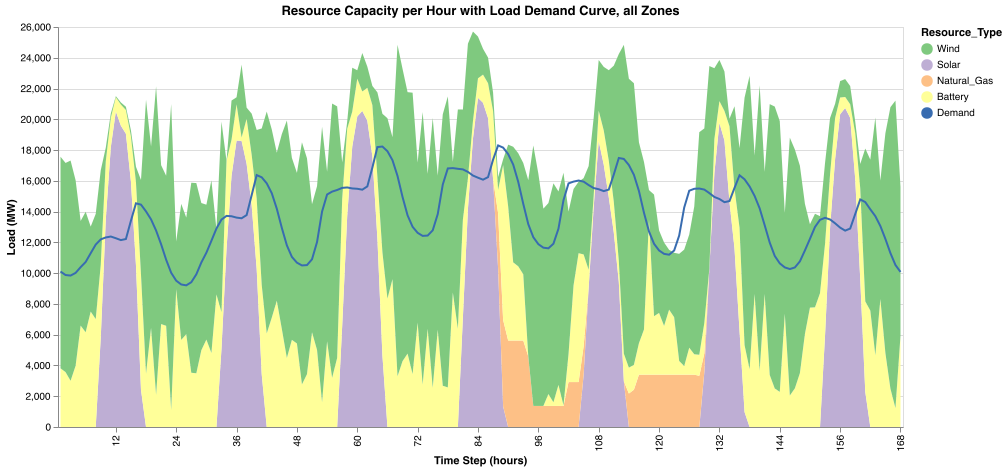

In [6]:
power_plot  |>
@vlplot()+
@vlplot(mark={:area},
    x={:Hour,title="Time Step (hours)",labels="Resource_Type:n",axis={values=0:12:168}}, y={:MW,title="Load (MW)",type="quantitative"},
    color={"Resource_Type:n",scale={scheme="accent"},sort="descending"},order={field="Resource_Type:n"},width=845,height=400)+
@vlplot(mark=:line,x=:Hour,y=:Demand_Total,lables="Demand",color={datum="Demand",legend={title=nothing}},title="Resource Capacity per Hour with Load Demand Curve, all Zones")

We can separate it by zone in the following plot:

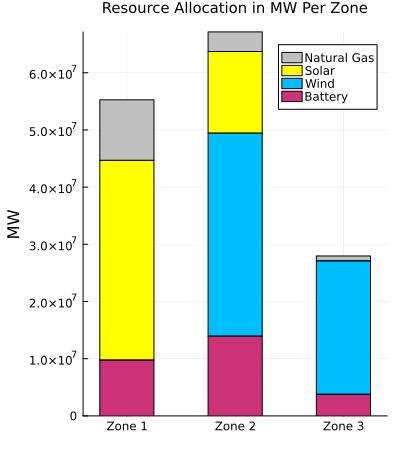

In [7]:
Zone1 = [power[2,2] power[2,5] 0 power[2,9]]
Zone2 = [power[2,3] power[2,7] power[2,6] power[2,10]]
Zone3 = [power[2,4] 0 power[2,8] power[2,11]]

colors=[:silver :yellow :deepskyblue :violetred3]

groupedbar(["Zone 1", "Zone 2", "Zone 3"],[Zone1; Zone2; Zone3], bar_position = :stack, bar_width=0.5,size=(400,450),
    labels=["Natural Gas" "Solar" "Wind" "Battery"],
    title="Resource Allocation in MW Per Zone",ylabel="MW",color=colors, titlefontsize=10)

Below is a heatmap for the natural gas plant in Massachusetts. It is normalized by the end capacity in `capcity.csv`. To change which plant the heat map plots, change the DataFrame column in `power` when defining `power_cap` below, and the corresponding capacity.

In [10]:
capacity = CSV.read(joinpath(case,"results/capacity.csv"),DataFrame,missingstring="NA")
Period_map = CSV.read(joinpath(case,"TDR_results/Period_map.csv"),DataFrame,missingstring="NA")

# Take the EndCap and power of MA_natural_gas_combined_cycle
cap = capacity[1,"EndCap"]
power_cap = power[3:end,"MA_natural_gas_combined_cycle"]/cap;

# Reconstruction of all hours of the year from TDR
recon = []
for i in range(1,52)
    index = Period_map[i,"Rep_Period_Index"]
    recon_temp = power_cap[(168*index-167):(168*index)]
    recon = [recon; recon_temp]
end

# Convert to matrix format 
heat = recon[1:24]
for i in range(1,364)
    heat = [heat recon[(i*24-23):(i*24)]]
end


In [11]:
recon

8736-element Vector{Any}:
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  ⋮
  0.206848793510113
  0.206848793510113
  0.24001117668117658
  0.4419846015173355
  0.4419846015173355
  0.4419846015173355
  0.4419846015173355
  0.3816528151383853
  0.17576472011265878
  0.10420315378130483
  0.016295690104479656
 -0.0

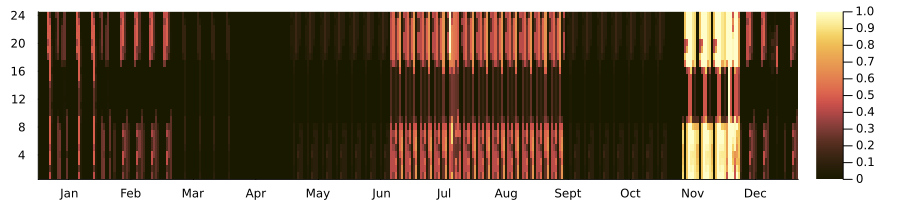

In [26]:
Plots.heatmap(heat,yticks=0:4:24,xticks=([15:30:364;],
        ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]),
    size=(900,200),c=:lajolla)

### Cost and Revenue <a id="cost"></a>

The basic cost of each power plant and the revenue it generates can be found in files `costs.csv`, `NetRevenue.csv`,and `EnergyRevenue.csv`. `NetRevenue.csv` breaks down each specific cost per node in each zone, which is useful to visualize what the cost is coming from.

In [11]:
netrevenue =  CSV.read(joinpath(case,"results/NetRevenue.csv"),DataFrame,missingstring="NA")

Row,region,Resource,zone,Cluster,R_ID,Inv_cost_MW,Inv_cost_MWh,Inv_cost_charge_MW,Fixed_OM_cost_MW,Fixed_OM_cost_MWh,Fixed_OM_cost_charge_MW,Var_OM_cost_out,Fuel_cost,Var_OM_cost_in,StartCost,Charge_cost,CO2SequestrationCost,EnergyRevenue,SubsidyRevenue,OperatingReserveRevenue,OperatingRegulationRevenue,ReserveMarginRevenue,ESRRevenue,EmissionsCost,RegSubsidyRevenue,Revenue,Cost,Profit
,String3,String31,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,MA,MA_natural_gas_combined_cycle,1,1,1,5.54734e8,0.0,0.0,8.72561e7,0.0,0.0,3.69253e7,2.10416e8,0.0,3.84832e7,0.0,0.0,2.77103e9,0.0,0.0,0.0,0.0,0.0,1.84321e9,0.0,2.77103e9,2.77103e9,1.43051e-6
2,CT,CT_natural_gas_combined_cycle,2,1,2,1.42906e8,0.0,0.0,2.11911e7,0.0,0.0,1.22258e7,4.97792e7,0.0,7.75292e6,0.0,0.0,8.4423e8,0.0,0.0,0.0,0.0,0.0,6.10375e8,0.0,8.4423e8,8.4423e8,1.19209e-7
3,ME,ME_natural_gas_combined_cycle,3,1,3,3.52336e7,0.0,0.0,8.77661e6,0.0,0.0,4.02739e6,2.26505e7,0.0,3.33663e6,0.0,0.0,2.19267e8,0.0,0.0,0.0,0.0,0.0,1.45243e8,0.0,2.19267e8,2.19267e8,0.0
4,MA,MA_solar_pv,1,1,4,1.27007e9,0.0,0.0,2.79327e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5494e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5494e9,1.5494e9,-2.86102e-6
5,CT,CT_onshore_wind,2,1,5,1.40748e9,0.0,0.0,6.25617e8,0.0,0.0,2.90683e6,0.0,0.0,0.0,0.0,0.0,2.036e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.036e9,2.036e9,-5.00679e-6
6,CT,CT_solar_pv,2,1,6,1.35108e9,0.0,0.0,2.97142e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.64822e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.64822e9,1.64822e9,9.53674e-7
7,ME,ME_onshore_wind,3,1,7,1.03673e9,0.0,0.0,4.60821e8,0.0,0.0,2.625e6,0.0,0.0,0.0,0.0,0.0,1.50017e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50017e9,1.50017e9,2.38419e-6
8,MA,MA_battery,1,0,8,4.29792e7,2.23673e8,0.0,1.07426e7,5.59033e7,0.0,7.59532e5,0.0,8.97367e5,0.0,1.3432e8,0.0,4.48833e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.48833e8,4.69275e8,-2.0442e7
9,CT,CT_battery,2,0,9,1.08405e8,5.73615e8,0.0,2.70957e7,1.43365e8,0.0,2.1875e6,0.0,2.58447e6,0.0,5.24177e8,0.0,1.31941e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.31941e9,1.38143e9,-6.20165e7


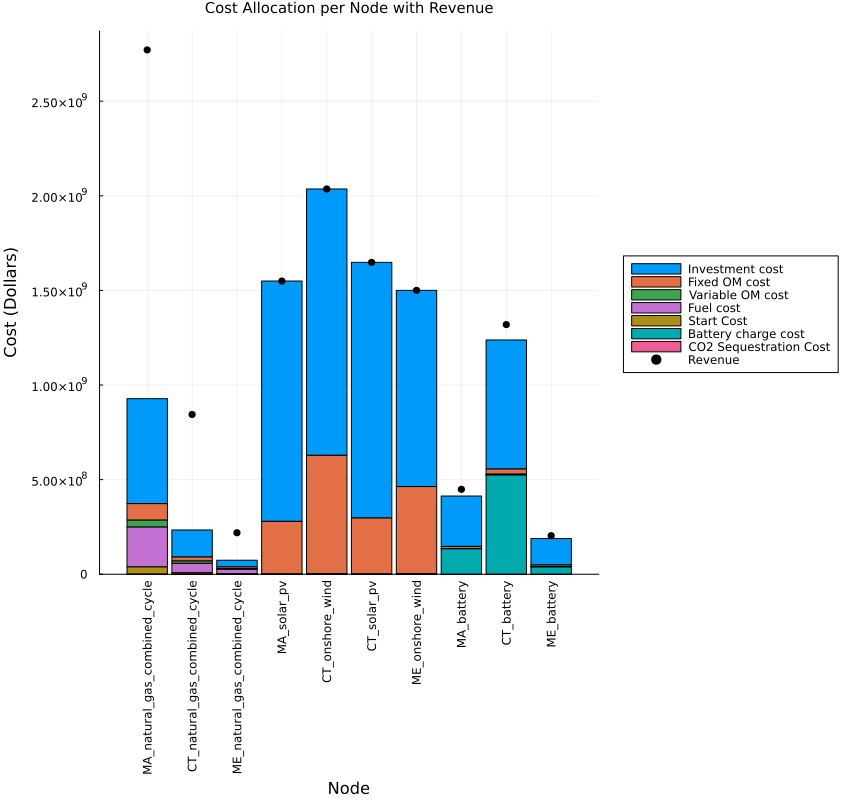

In [12]:
xnames = netrevenue[!,2]
names1 =  ["Investment cost" "Fixed OM cost" "Variable OM cost" "Fuel cost" "Start Cost" "Battery charge cost" "CO2 Sequestration Cost" "Revenue"]

netrev = [netrevenue[!,6]+netrevenue[!,7]+netrevenue[!,8] netrevenue[!,9]+netrevenue[!,11]+netrevenue[!,11] netrevenue[!,12]+netrevenue[!,14] netrevenue[!,13] netrevenue[!,15] netrevenue[!,16] netrevenue[!,17]]

groupedbar(xnames,netrev, bar_position = :stack, bar_width=0.9,size=(850,800),
    labels=names1,title="Cost Allocation per Node with Revenue",xlabel="Node",ylabel="Cost (Dollars)", 
    titlefontsize=10,legend=:outerright,ylims=[0,maximum(netrevenue[!,"Revenue"])+1e8],xrotation = 90)
StatsPlots.scatter!(xnames,netrevenue[!,"Revenue"],label="Revenue",color="black")


### Emissions  <a id="emms"></a>

The file `emmissions.csv` gives the total CO2 emmissions per zone for each hour GenX runs. The first three rows give the marginal CO2 abatement cost in $/ton CO2.

In [13]:
emm1 =  CSV.read(joinpath(case,"results/emissions.csv"),DataFrame)

Row,Zone,1,2,3,Total
,String15,Float64,Float64,Float64,Float64
1,CO2_Price_1,444.921,0.0,0.0,0.0
2,CO2_Price_2,0.0,468.668,0.0,0.0
3,CO2_Price_3,0.0,0.0,240.86,0.0
4,AnnualSum,4.14279e6,1.30236e6,6.03017e5,6.04816e6
5,t1,0.0,0.0,0.0,0.0
6,t2,0.0,0.0,0.0,0.0
7,t3,0.0,0.0,0.0,0.0
8,t4,0.0,0.0,0.0,0.0
9,t5,0.0,0.0,0.0,0.0


In [14]:
# Pre-processing
tstart = 470
tend = 1500
names_emm = ["Zone 1","Zone 2","Zone 3"]

emm_tot = DataFrame([emm1[3:end,2] emm1[3:end,3] emm1[3:end,4]],
    ["Zone 1","Zone 2","Zone 3"])


emm_plot = DataFrame([collect((tstart-3):(tend-3)) emm_tot[tstart:tend,1] repeat([names_emm[1]],(tend-tstart+1))],
    ["Hour","MW","Zone"]);

for i in range(2,3)
    emm_plot_temp = DataFrame([collect((tstart-3):(tend-3)) emm_tot[tstart:tend,i] repeat([names_emm[i]],(tend-tstart+1))],["Hour","MW","Zone"])
    emm_plot = [emm_plot; emm_plot_temp]
end


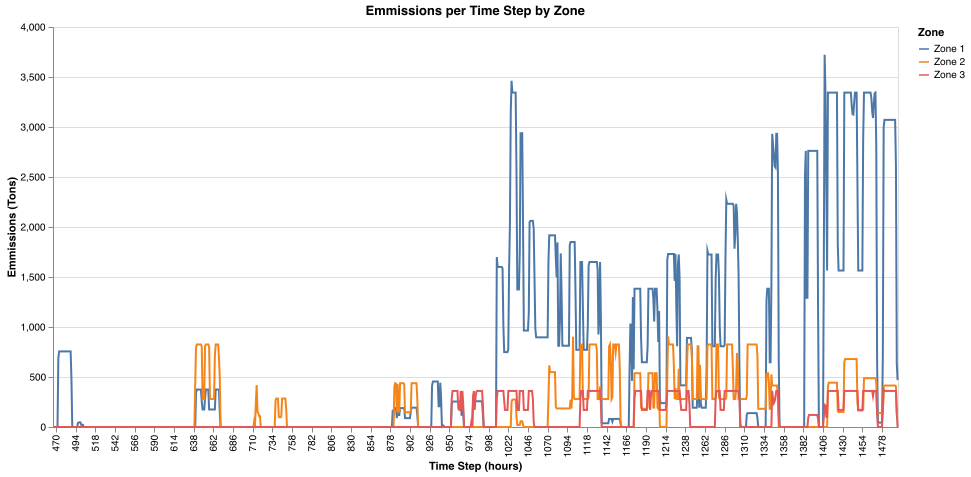

In [15]:
emm_plot  |>
@vlplot(mark={:line},
    x={:Hour,title="Time Step (hours)",labels="Zone:n",axis={values=tstart:24:tend}}, y={:MW,title="Emmissions (Tons)",type="quantitative"},
    color={"Zone:n"},width=845,height=400,title="Emmissions per Time Step by Zone")

Let's try changing the CO2 cap, as in Tutorial 7, and plotting the resulting emmissions.

In [16]:
genx_settings_TZ = YAML.load(open((joinpath(case,"settings/genx_settings.yml"))))
genx_settings_TZ["CO2Cap"] = 0
YAML.write_file((joinpath(case,"settings/genx_settings.yml")), genx_settings_TZ)

include("example_systems/1_three_zones/Run.jl")

# run outside of notebook

Configuring Settings
Time Series Data Already Clustered.
Configuring Solver
Loading Inputs
Reading Input CSV Files
Network.csv Successfully Read!
Demand (load) data Successfully Read!
Fuels_data.csv Successfully Read!

Summary of resources loaded into the model:
-------------------------------------------------------
	Resource type 		Number of resources
	Thermal        		3
	VRE            		4
	Storage        		3
Total number of resources: 10
-------------------------------------------------------


[ Info: Thermal.csv Successfully Read.
[ Info: Vre.csv Successfully Read.
[ Info: Storage.csv Successfully Read.
[ Info: Resource_energy_share_requirement.csv Successfully Read.
[ Info: Resource_capacity_reserve_margin.csv Successfully Read.
[ Info: Resource_minimum_capacity_requirement.csv Successfully Read.


Generators_variability.csv Successfully Read!
Validating time basis
Minimum_capacity_requirement.csv Successfully Read!
CSV Files Successfully Read In From /Users/mayamutic/Desktop/GenX-Tutorials/Tutorials/example_systems/1_three_zones
Generating the Optimization Model
Discharge Module
Non-served Energy Module
Investment Discharge Module
Unit Commitment Module
Fuel Module
CO2 Module
Investment Transmission Module
Transmission Module
Dispatchable Resources Module
Storage Resources Module
Storage Investment Module
Storage Core Resources Module
Storage Resources with Symmetric Charge/Discharge Capacity Module
Thermal (Unit Commitment) Resources Module
Minimum Capacity Requirement Module
Time elapsed for model building is
0.531860834
Solving Model
Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
118035 rows, 81083 cols, 422475 nonzeros
110878 rows, 73926 cols, 422989 nonzeros
Presolve : Reductions: rows 110878(-42517); columns 73926(-46210); elements 4

Time elapsed for writing costs is
0.099885792
Time elapsed for writing capacity is
0.000646583
Time elapsed for writing power is
0.021790625
Time elapsed for writing charge is
0.0167645
Time elapsed for writing capacity factor is
0.021259458
Time elapsed for writing storage is
0.009532667
Time elapsed for writing curtailment is
0.019054083
Time elapsed for writing nse is
0.0452305
Time elapsed for writing power balance is
0.053504209
Time elapsed for writing transmission flows is
0.004709417
Time elapsed for writing transmission losses is
0.013975458
Time elapsed for writing network expansion is
0.000157
Time elapsed for writing emissions is
0.050411042
Time elapsed for writing reliability is
0.005842667
Time elapsed for writing storage duals is
0.024307708
Time elapsed for writing commitment is
0.006124458
Time elapsed for writing startup is
0.012590917
Time elapsed for writing shutdown is
0.012514292
Time elapsed for writing fuel consumption is
0.054159667
Time elapsed for writing co

In [17]:
emm2 =  CSV.read(joinpath(case,"results_1/emissions.csv"),DataFrame)

Row,Zone,1,2,3,Total
,String15,Float64,Float64,Float64,Float64
1,AnnualSum,1.68155e7,1.41088e7,4310.21,3.09286e7
2,t1,997.169,0.0,0.0,997.169
3,t2,997.169,0.0,0.0,997.169
4,t3,997.169,0.0,0.0,997.169
5,t4,997.169,0.0,0.0,997.169
6,t5,997.169,0.0,0.0,997.169
7,t6,997.169,0.0,0.0,997.169
8,t7,997.169,0.0,0.0,997.169
9,t8,997.169,0.0,0.0,997.169


In [18]:
# Pre-processing
tstart = 470
tend = 1500
names_emm = ["Zone 1","Zone 2","Zone 3"]

emm_tot2 = DataFrame([emm2[3:end,2] emm2[3:end,3] emm2[3:end,4]],
    ["Zone 1","Zone 2","Zone 3"])


emm_plot2 = DataFrame([collect((tstart-3):(tend-3)) emm_tot2[tstart:tend,1] repeat([names_emm[1]],(tend-tstart+1))],
    ["Hour","MW","Zone"]);

for i in range(2,3)
    emm_plot_temp = DataFrame([collect((tstart-3):(tend-3)) emm_tot2[tstart:tend,i] repeat([names_emm[i]],(tend-tstart+1))],["Hour","MW","Zone"])
    emm_plot2 = [emm_plot2; emm_plot_temp]
end

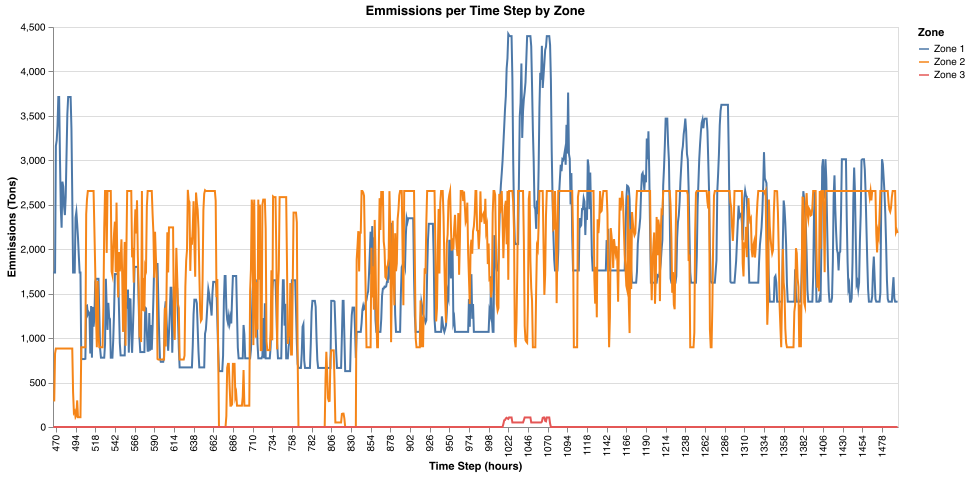

In [19]:
emm_plot2  |>
@vlplot(mark={:line},
    x={:Hour,title="Time Step (hours)",labels="Zone:n",axis={values=tstart:24:tend}}, y={:MW,title="Emmissions (Tons)",type="quantitative"},
    color={"Zone:n"},width=845,height=400,title="Emmissions per Time Step by Zone")

We can see how the emmissions, summed over all zones, compare in the following plot:

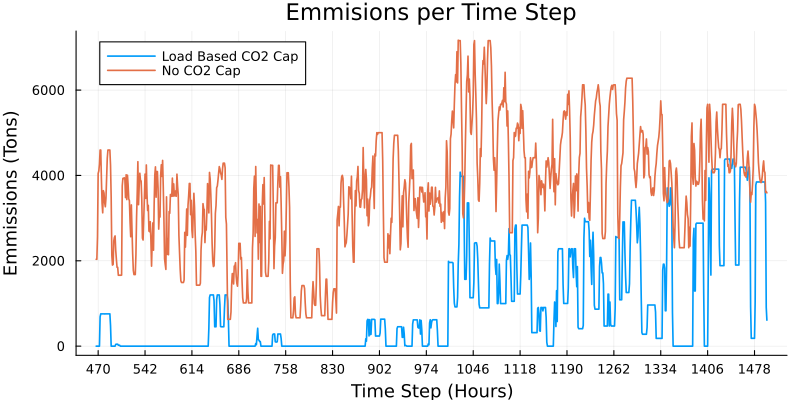

In [20]:
emm1sum = sum(eachcol(emm_tot));
emm2sum = sum(eachcol(emm_tot2));

Plots.plot(collect((tstart-3):(tend-3)),emm1sum[tstart:tend],size=(800,400),label="Load Based CO2 Cap",
    xlabel="Time Step (Hours)",ylabel="Emmissions (Tons)",thickness_scaling = 1.1,linewidth = 1.5,
    title="Emmisions per Time Step",xticks=tstart:72:tend)
Plots.plot!(collect((tstart-3):(tend-3)),emm2sum[tstart:tend],label="No CO2 Cap",linewidth = 1.5)

Finally, set the CO2 Cap back to 2:

In [21]:
genx_settings_TZ["CO2Cap"] = 2
YAML.write_file((joinpath(case,"settings/genx_settings.yml")), genx_settings_TZ)